# Australia Rainfals Prediction

Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia


# Importing Necessary Libraries:-

In [48]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Load data set in pandas

In [49]:
df=pd.read_csv("Rainfall Weaher Forecasting.csv")

In [50]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [51]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [181]:
#Checking the data  is object type ,float type,and integer type 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# features of data

In [53]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [54]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Data type are object type ,float type

Descriptive Statistics: It is used to summarize and describe the features of data in a meaningful way to extract insights. It uses two types of statistic to describe or summarize data:

In [55]:
df.describe(include="all")

Date   Location      MinTemp      MaxTemp     Rainfall  \
count         8425       8425  8350.000000  8365.000000  8185.000000   
unique        3004         12          NaN          NaN          NaN   
top     2011-01-31  Melbourne          NaN          NaN          NaN   
freq             5       1622          NaN          NaN          NaN   
mean           NaN        NaN    13.193305    23.859976     2.805913   
std            NaN        NaN     5.403596     6.136408    10.459379   
min            NaN        NaN    -2.000000     8.200000     0.000000   
25%            NaN        NaN     9.200000    19.300000     0.000000   
50%            NaN        NaN    13.300000    23.300000     0.000000   
75%            NaN        NaN    17.400000    28.000000     1.000000   
max            NaN        NaN    28.500000    45.500000   371.000000   

        Evaporation     Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   4913.000000  4431.000000        7434    7434.000000       7596  ...   
unique          NaN          NaN          16            NaN         16  ...   
top             NaN          NaN           N            NaN          N  ...   
freq            NaN          NaN         713            NaN        906  ...   
mean       5.389395     7.632205         NaN      40.174469        NaN  ...   
std        5.044484     3.896235         NaN      14.665721        NaN  ...   
min        0.000000     0.000000         NaN       7.000000        NaN  ...   
25%        2.600000     4.750000         NaN      30.000000        NaN  ...   
50%        4.600000     8.700000         NaN      39.000000        NaN  ...   
75%        7.000000    10.700000         NaN      50.000000        NaN  ...   
max      145.000000    13.900000         NaN     107.000000        NaN  ...   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count   8366.000000  8323.000000  7116.000000  7113.000000  6004.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      67.822496    51.249790  1017.640233  1015.236075     4.566622   
std       16.833283    18.423774     6.828699     6.766681     2.877658   
min       10.000000     6.000000   989.800000   982.900000     0.000000   
25%       56.000000    39.000000  1013.000000  1010.400000     1.000000   
50%       68.000000    51.000000  1017.700000  1015.300000     5.000000   
75%       80.000000    63.000000  1022.300000  1019.800000     7.000000   
max      100.000000    99.000000  1039.000000  1036.000000     8.000000   

           Cloud3pm      Temp9am      Temp3pm  RainToday  RainTomorrow  
count   5970.000000  8369.000000  8329.000000       8185          8186  
unique          NaN          NaN          NaN          2             2  
top             NaN          NaN          NaN         No            No  
freq            NaN          NaN          NaN       6195          6195  
mean       4.503183    17.762015    22.442934        NaN           NaN  
std        2.731659     5.627035     5.980020        NaN           NaN  
min        0.000000     1.900000     7.300000        NaN           NaN  
25%        2.000000    13.800000    18.000000        NaN           NaN  
50%        5.000000    17.800000    21.900000        NaN           NaN  
75%        7.000000    21.900000    26.400000        NaN           NaN  
max        8.000000    39.400000    44.100000        NaN           NaN  

[11 rows x 23 columns]

In [56]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

#checking the dimension of the dataset

In [57]:
df.shape

(8425, 23)

#Cardinality: The number of unique values in each categorical feature is known as cardinality.
#Finding unique values in the dataset

In [58]:
df.nunique().to_frame("unique values")

unique values
Date                    3004
Location                  12
MinTemp                  285
MaxTemp                  331
Rainfall                 250
Evaporation              116
Sunshine                 140
WindGustDir               16
WindGustSpeed             52
WindDir9am                16
WindDir3pm                16
WindSpeed9am              34
WindSpeed3pm              35
Humidity9am               90
Humidity3pm               94
Pressure9am              384
Pressure3pm              374
Cloud9am                   9
Cloud3pm                   9
Temp9am                  304
Temp3pm                  328
RainToday                  2
RainTomorrow               2

Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [59]:
dfcor=df.corr()
dfcor

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.720955  0.091642     0.348643  0.081365   
MaxTemp        0.720955  1.000000 -0.088906     0.424728  0.523909   
Rainfall       0.091642 -0.088906  1.000000     0.043463 -0.209654   
Evaporation    0.348643  0.424728  0.043463     1.000000  0.340893   
Sunshine       0.081365  0.523909 -0.209654     0.340893  1.000000   
WindGustSpeed  0.241317  0.146113  0.104999     0.214069 -0.018455   
WindSpeed9am   0.137263  0.013425  0.051349     0.176701 -0.025112   
WindSpeed3pm   0.180091  0.088797  0.025185     0.142421  0.045031   
Humidity9am   -0.130906 -0.392496  0.231702    -0.286869 -0.512349   
Humidity3pm    0.079569 -0.424217  0.238730    -0.221244 -0.630536   
Pressure9am   -0.465478 -0.347285 -0.080412    -0.218171  0.028666   
Pressure3pm   -0.458665 -0.430074 -0.037270    -0.233401 -0.047098   
Cloud9am       0.111213 -0.307700  0.195157    -0.084288 -0.705577   
Cloud3pm       0.046889 -0.301675  0.159250    -0.152637 -0.723957   
Temp9am        0.888342  0.869503 -0.007191     0.405467  0.348708   
Temp3pm        0.689652  0.978665 -0.092263     0.414156  0.546057   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.241317      0.137263      0.180091    -0.130906   
MaxTemp             0.146113      0.013425      0.088797    -0.392496   
Rainfall            0.104999      0.051349      0.025185     0.231702   
Evaporation         0.214069      0.176701      0.142421    -0.286869   
Sunshine           -0.018455     -0.025112      0.045031    -0.512349   
WindGustSpeed       1.000000      0.656079      0.711403    -0.286045   
WindSpeed9am        0.656079      1.000000      0.566322    -0.358981   
WindSpeed3pm        0.711403      0.566322      1.000000    -0.252488   
Humidity9am        -0.286045     -0.358981     -0.252488     1.000000   
Humidity3pm        -0.097380     -0.111595     -0.091248     0.636255   
Pressure9am        -0.430736     -0.197189     -0.291271     0.154699   
Pressure3pm        -0.394745     -0.156517     -0.240378     0.188463   
Cloud9am            0.030124     -0.000607      0.005807     0.472126   
Cloud3pm            0.104157      0.068930      0.003894     0.352736   
Temp9am             0.211477      0.109936      0.185329    -0.378389   
Temp3pm             0.106872     -0.002619      0.066201    -0.383788   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079569    -0.465478    -0.458665  0.111213  0.046889   
MaxTemp          -0.424217    -0.347285    -0.430074 -0.307700 -0.301675   
Rainfall          0.238730    -0.080412    -0.037270  0.195157  0.159250   
Evaporation      -0.221244    -0.218171    -0.233401 -0.084288 -0.152637   
Sunshine         -0.630536     0.028666    -0.047098 -0.705577 -0.723957   
WindGustSpeed    -0.097380    -0.430736    -0.394745  0.030124  0.104157   
WindSpeed9am     -0.111595    -0.197189    -0.156517 -0.000607  0.068930   
WindSpeed3pm     -0.091248    -0.291271    -0.240378  0.005807  0.003894   
Humidity9am       0.636255     0.154699     0.188463  0.472126  0.352736   
Humidity3pm       1.000000     0.001763     0.076002  0.509797  0.520221   
Pressure9am       0.001763     1.000000     0.961922 -0.091391 -0.104535   
Pressure3pm       0.076002     0.961922     1.000000 -0.015692 -0.035986   
Cloud9am          0.509797    -0.091391    -0.015692  1.000000  0.619202   
Cloud3pm          0.520221    -0.104535    -0.035986  0.619202  1.000000   
Temp9am          -0.130973    -0.441901    -0.472788 -0.161867 -0.151438   
Temp3pm          -0.491634    -0.302488    -0.394852 -0.326547 -0.348986   

                Temp9am   Temp3pm  
MinTemp        0.888342  0.689652  
MaxTemp        0.869503  0.978665  
Rainfall      -0.007191 -0.092263  
Evaporation    0.405467  0.414156  
Sunshine       0.348708  0.546057  
WindGustSpeed  0.211477  0.106872  
WindSpeed9am   0.109936 -0.002619  
Wi

In [60]:
np.mean(df["MaxTemp"])

23.85997609085475

In [61]:
import statistics
mode=statistics.mode(df["MaxTemp"])
print("mode:",mode)

mode: 19.0


In [62]:
median=statistics.median(df["MaxTemp"])
print("median:",median)

median: 18.3


#Here we drop duplicate column from dataset

In [63]:
df=df.drop_duplicates()
print("Rows and columns after removing duplicates:",df.shape)

Rows and columns after removing duplicates: (6762, 23)


<Axes: >

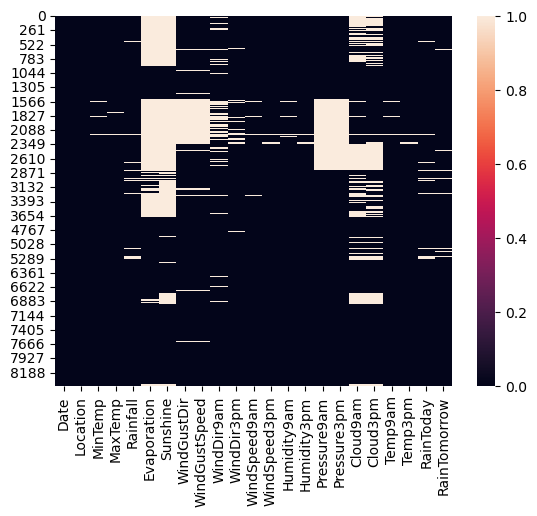

In [64]:
sns.heatmap(df.isnull())

<Axes: >

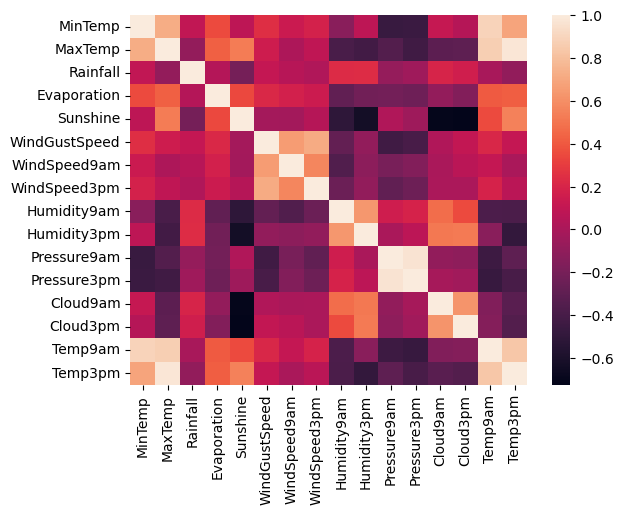

In [65]:
sns.heatmap(dfcor)

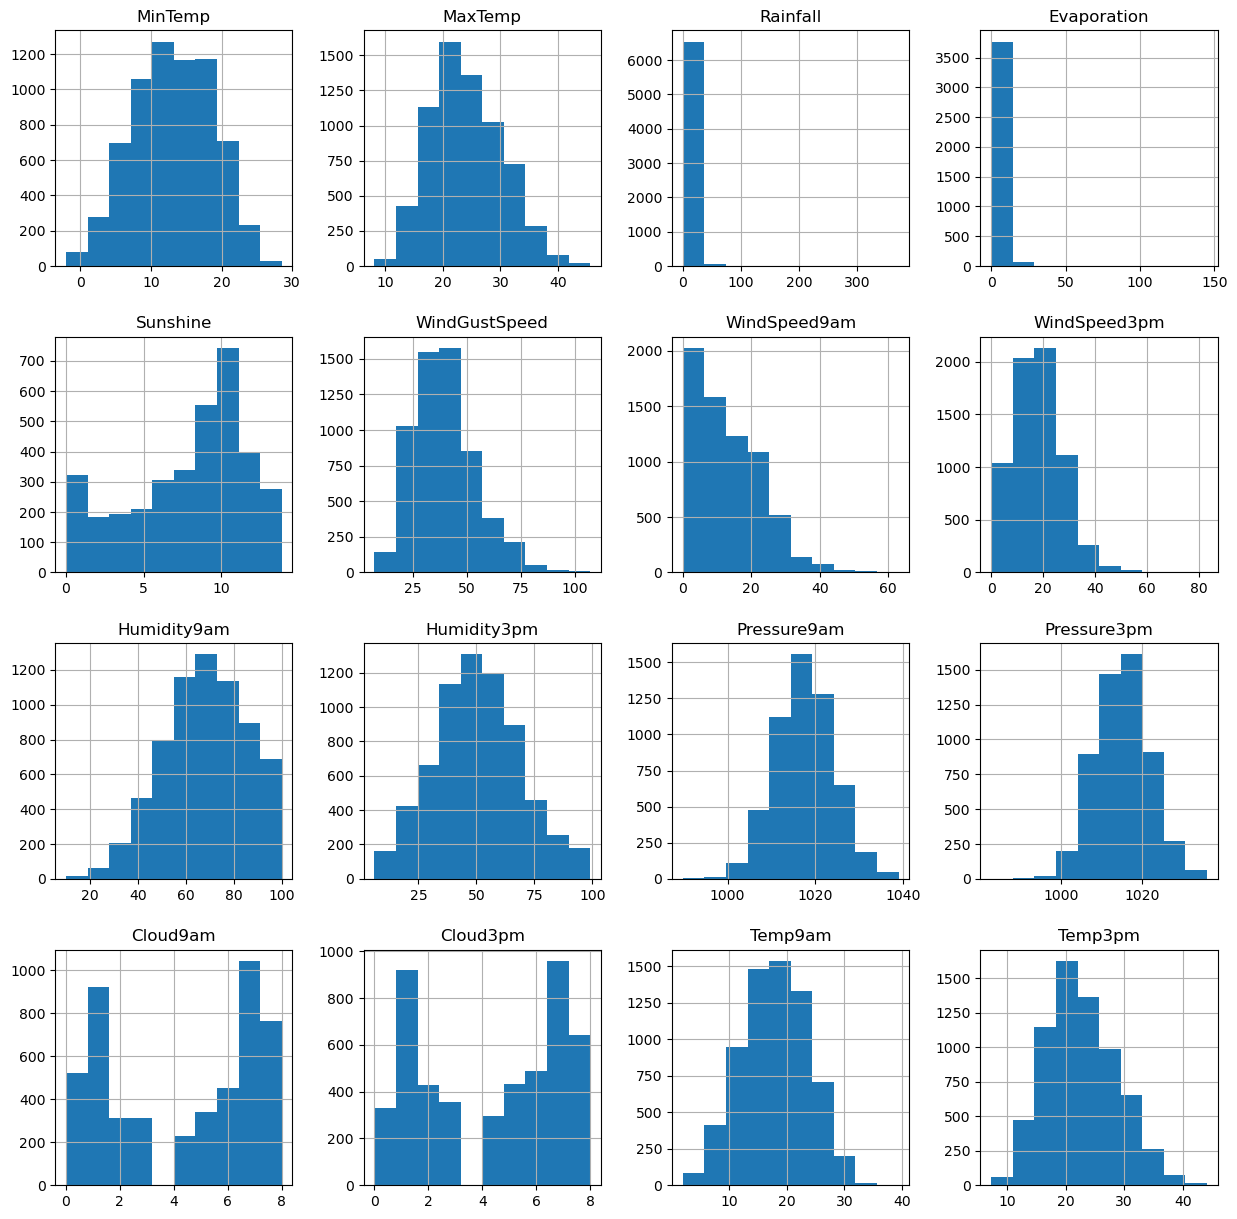

In [66]:
df.hist(figsize=(15,15))
plt.show()

In [67]:
df["Rainfall"].value_counts()

0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [68]:
df["Sunshine"].value_counts()

0.0     119
11.1     61
11.0     59
11.2     59
9.2      56
       ... 
2.5       5
13.6      4
13.8      2
13.9      2
13.5      1
Name: Sunshine, Length: 140, dtype: int64

In [69]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

#In many columns null value is present ,maximun null values is present in Sunshine column ,only Date and Location Column has no null values

In [70]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     False     False    False    False     False         True      True   
1     False     False    False    False     False         True      True   
2     False     False    False    False     False         True      True   
3     False     False    False    False     False         True      True   
4     False     False    False    False     False         True      True   
...     ...       ...      ...      ...       ...          ...       ...   
8420  False     False    False    False     False         True      True   
8421  False     False    False    False     False         True      True   
8422  False     False    False    False     False         True      True   
8423  False     False    False    False     False         True      True   
8424  False     False    False     True     False         True      True   

      WindGustDir  WindGu

<Axes: >

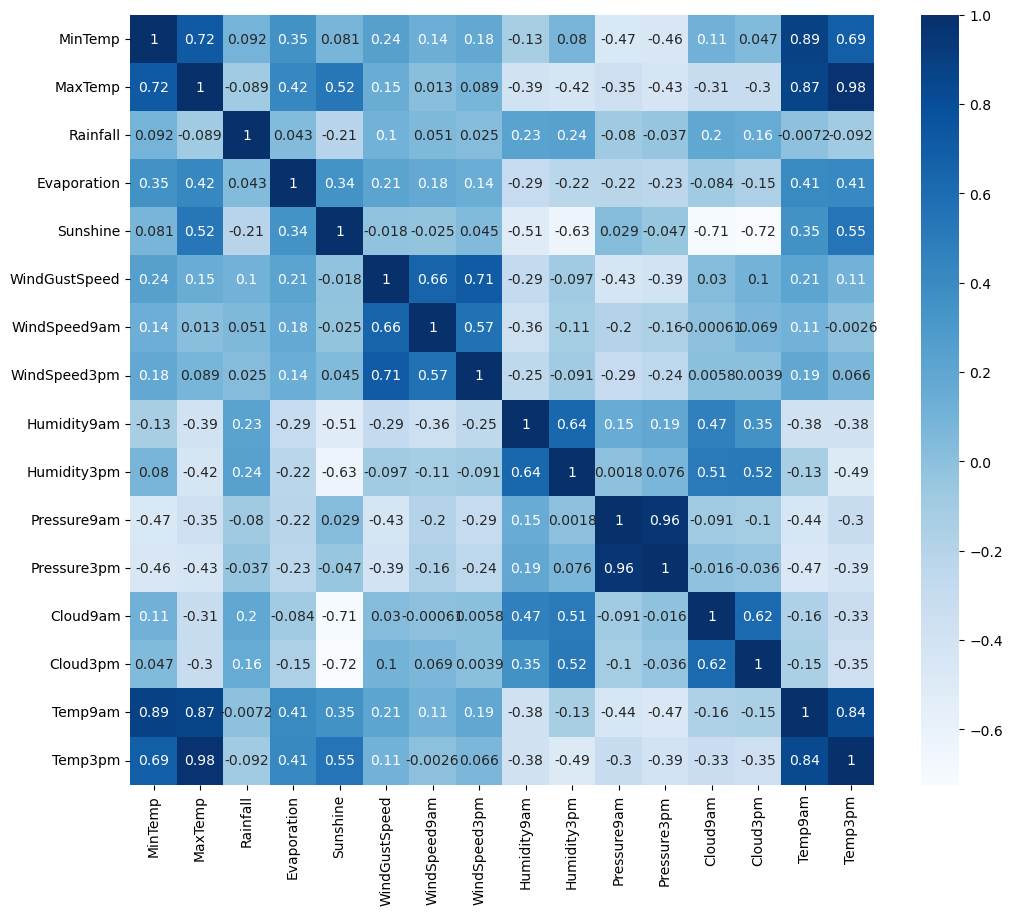

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

-0.6371369042547046


<Axes: xlabel='Sunshine', ylabel='Density'>

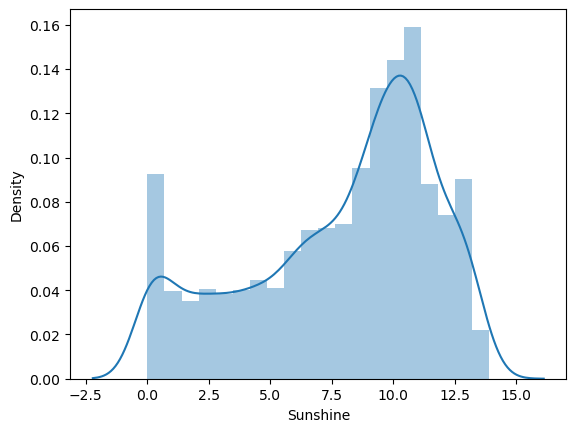

In [72]:
print(df["Sunshine"].skew())
sns.distplot(df["Sunshine"],kde=True)

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

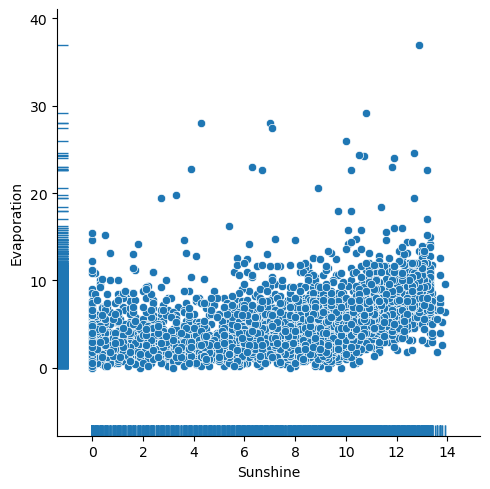

In [73]:
sns.relplot(data=df,x="Sunshine",y="Evaporation")
sns.rugplot(data=df,x="Sunshine",y="Evaporation",legend=False)

MinTemp             Axes(0.125,0.653529;0.0945122x0.226471)
MaxTemp          Axes(0.238415,0.653529;0.0945122x0.226471)
Rainfall         Axes(0.351829,0.653529;0.0945122x0.226471)
Evaporation      Axes(0.465244,0.653529;0.0945122x0.226471)
Sunshine         Axes(0.578659,0.653529;0.0945122x0.226471)
WindGustSpeed    Axes(0.692073,0.653529;0.0945122x0.226471)
WindSpeed9am     Axes(0.805488,0.653529;0.0945122x0.226471)
WindSpeed3pm        Axes(0.125,0.381765;0.0945122x0.226471)
Humidity9am      Axes(0.238415,0.381765;0.0945122x0.226471)
Humidity3pm      Axes(0.351829,0.381765;0.0945122x0.226471)
Pressure9am      Axes(0.465244,0.381765;0.0945122x0.226471)
Pressure3pm      Axes(0.578659,0.381765;0.0945122x0.226471)
Cloud9am         Axes(0.692073,0.381765;0.0945122x0.226471)
Cloud3pm         Axes(0.805488,0.381765;0.0945122x0.226471)
Temp9am                 Axes(0.125,0.11;0.0945122x0.226471)
Temp3pm              Axes(0.238415,0.11;0.0945122x0.226471)
dtype: object

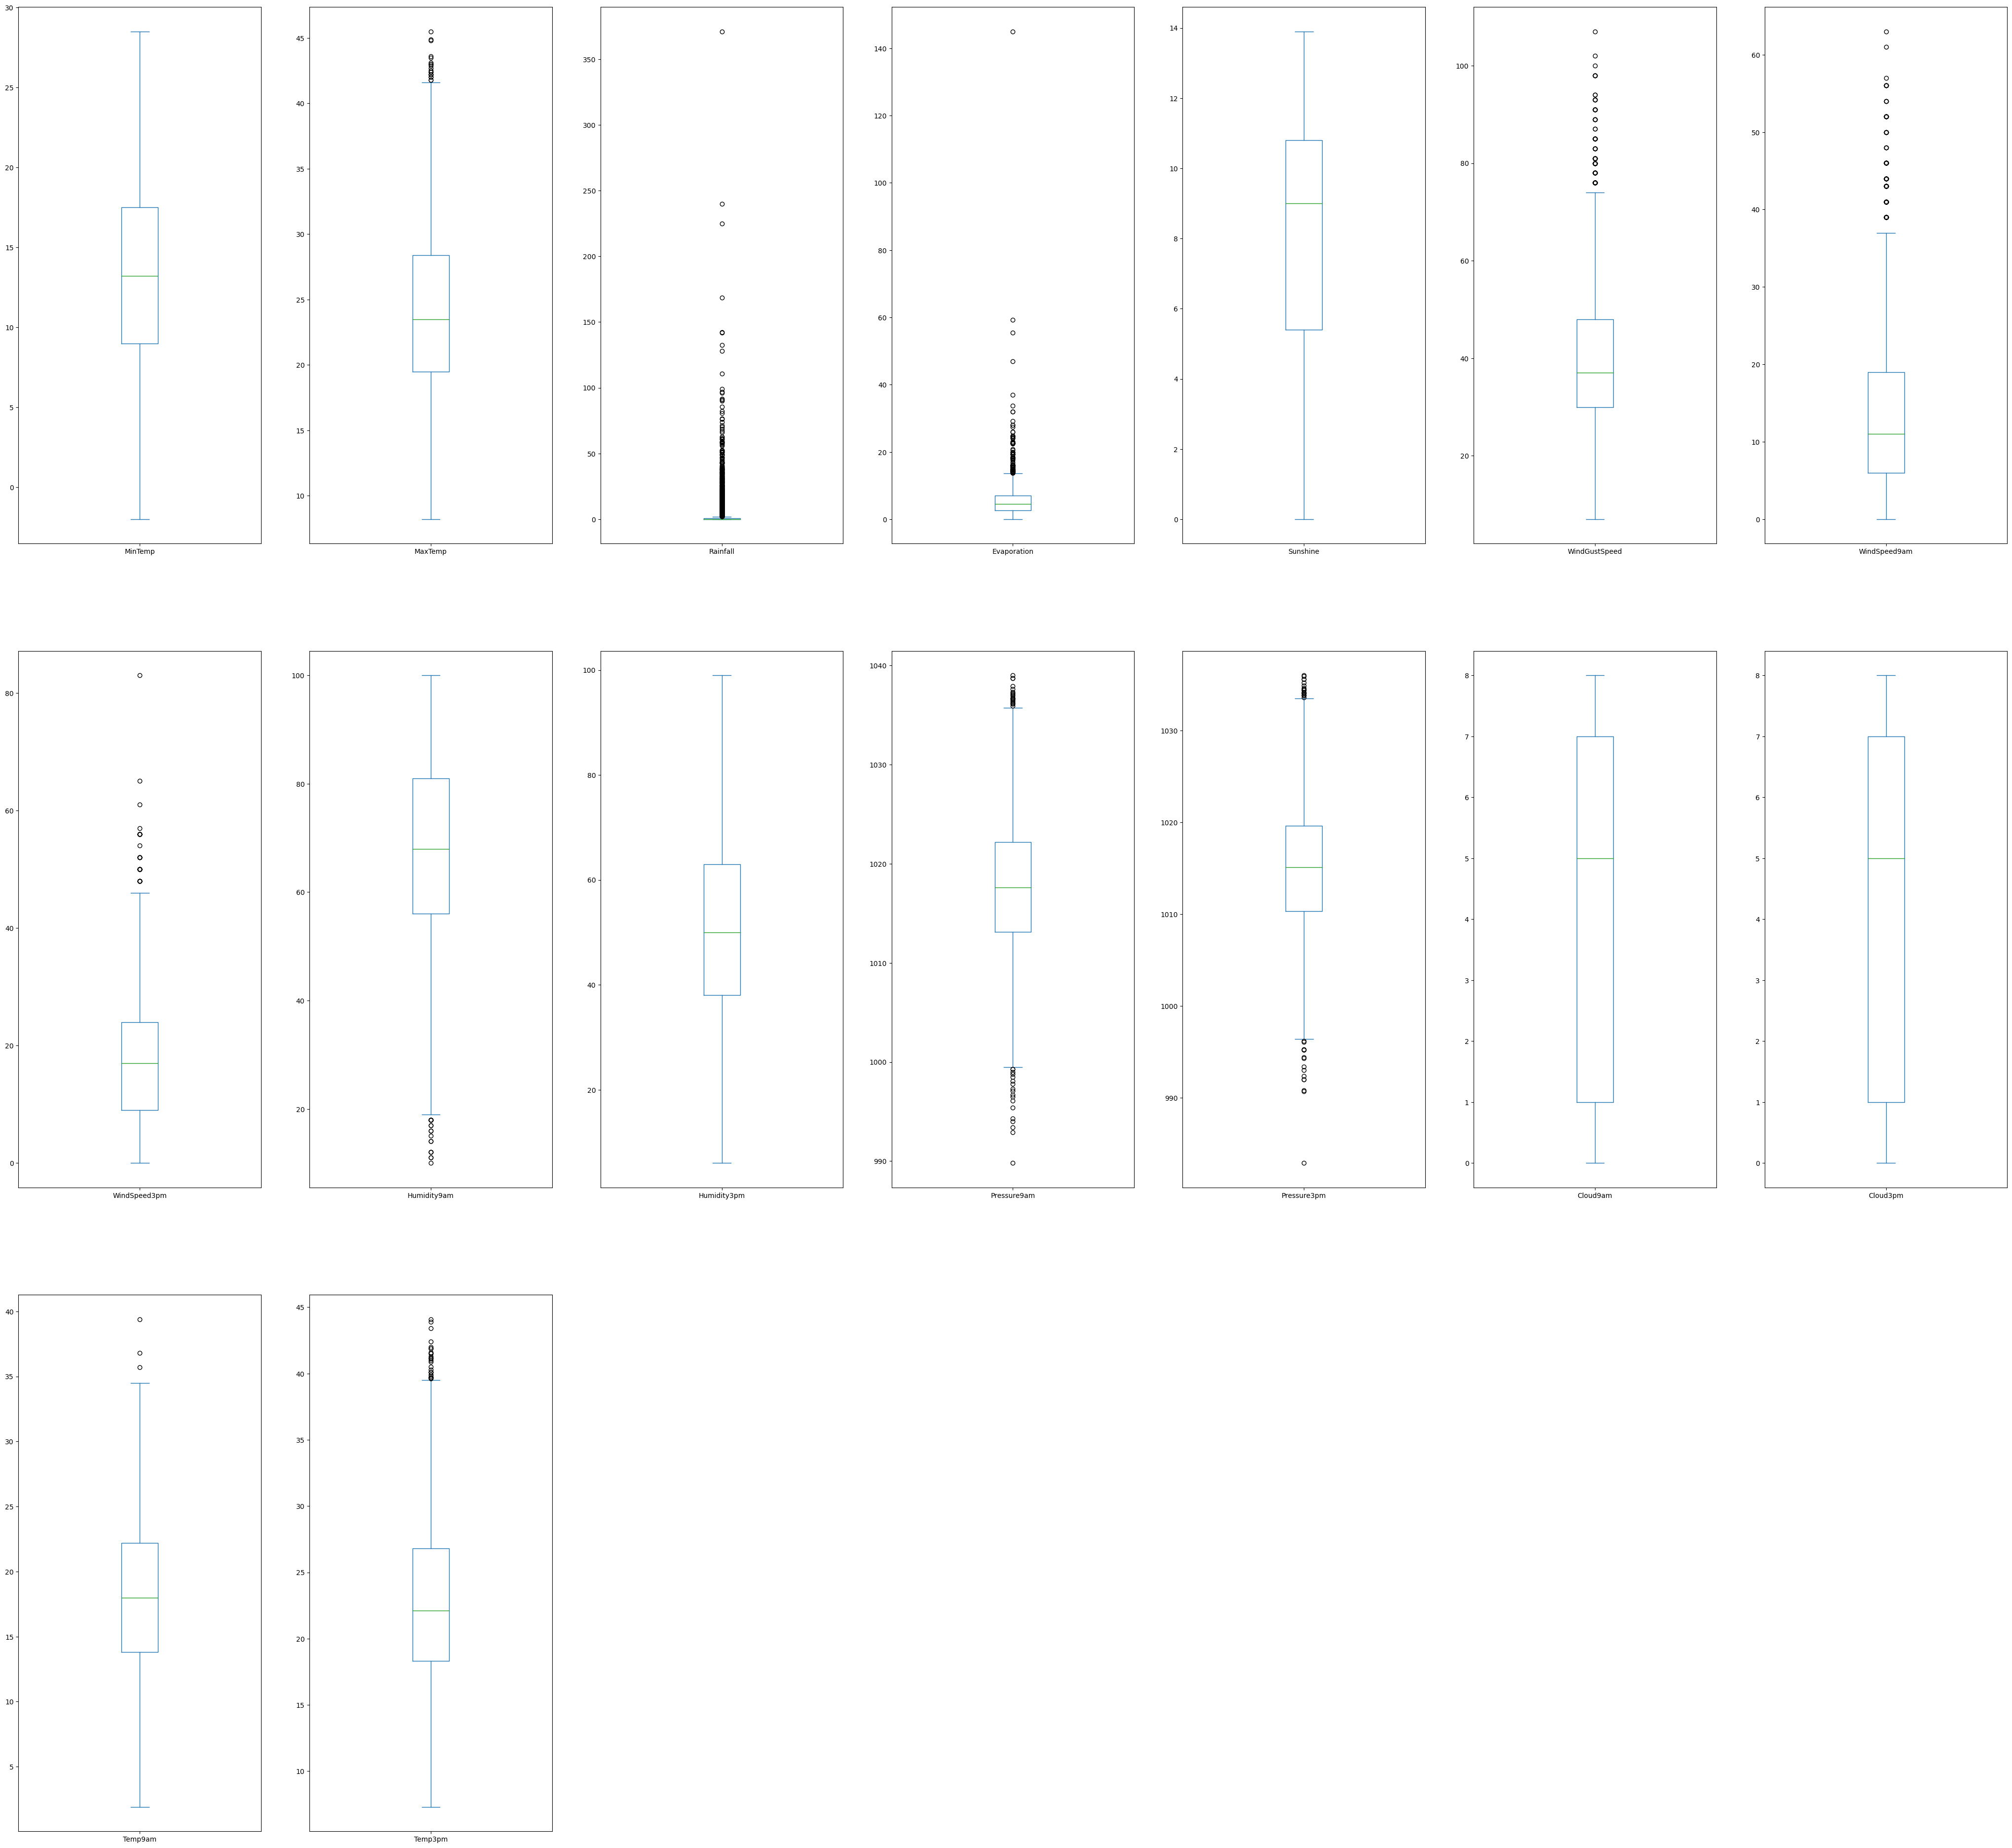

In [74]:
df.plot(kind="box",subplots=True,layout=(3,7),figsize=(52,48))

<Axes: xlabel='Humidity3pm', ylabel='Density'>

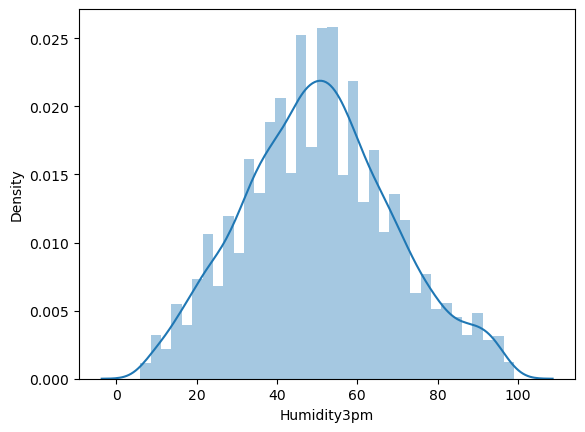

In [75]:
sns.distplot(df["Humidity3pm"])

<Axes: xlabel='WindSpeed3pm', ylabel='Density'>

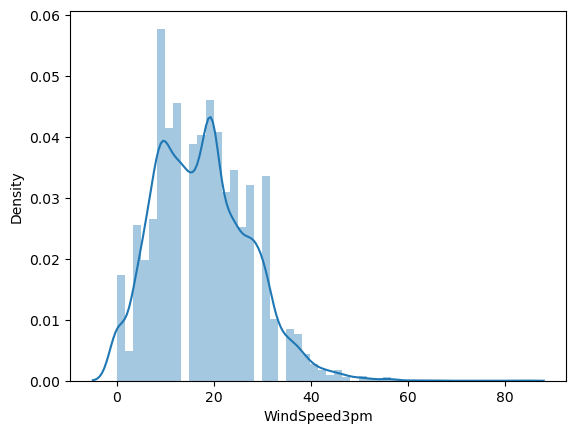

In [76]:
sns.distplot(df["WindSpeed3pm"])

<Axes: xlabel='Rainfall', ylabel='Density'>

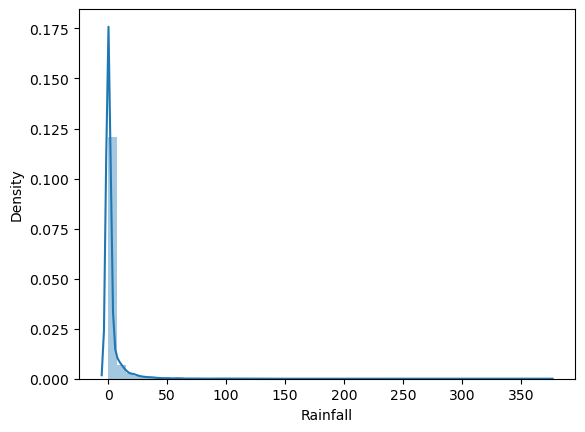

In [77]:
sns.distplot(df["Rainfall"])

<Axes: xlabel='MaxTemp', ylabel='Density'>

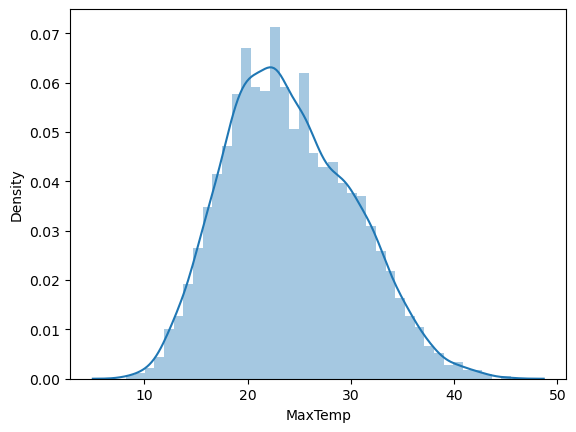

In [78]:
sns.distplot(df["MaxTemp"])

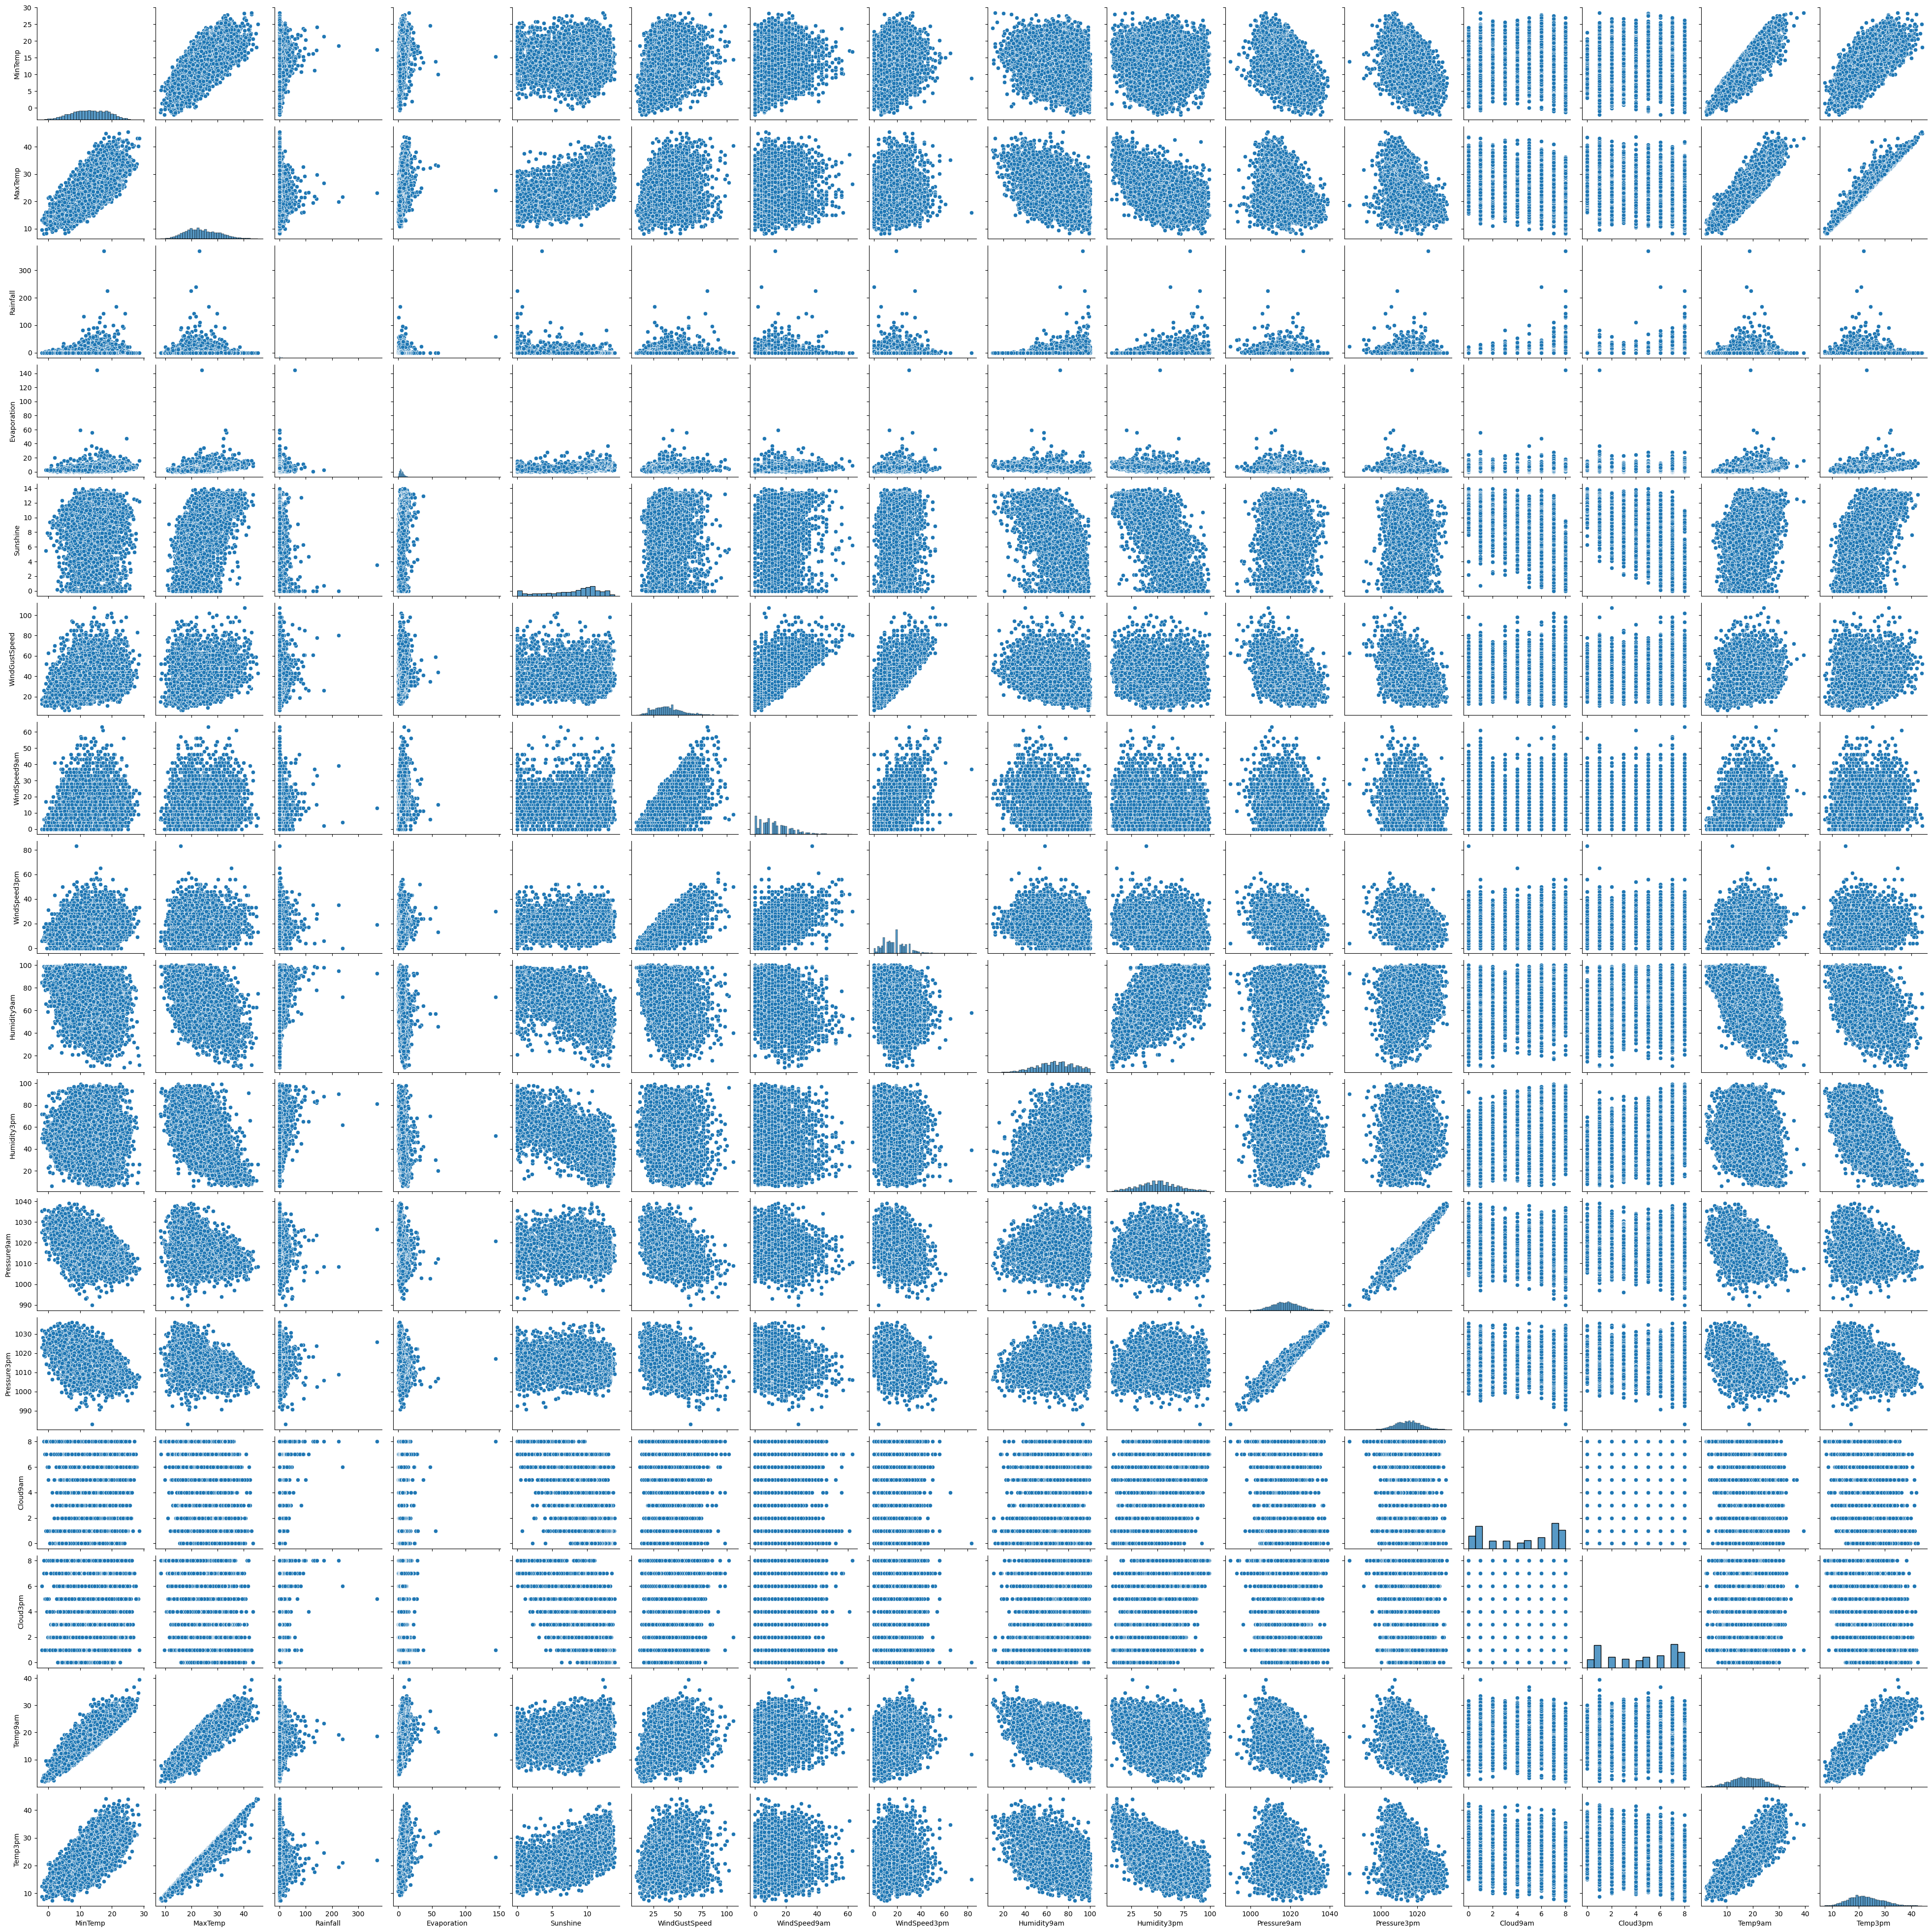

In [79]:
sns.pairplot(df)

In [80]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\n Number data types columns are:\n",numerical_cols)

object data type columns are:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

 Number data types columns are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


No     5052
Yes    1572
Name: RainToday, dtype: int64


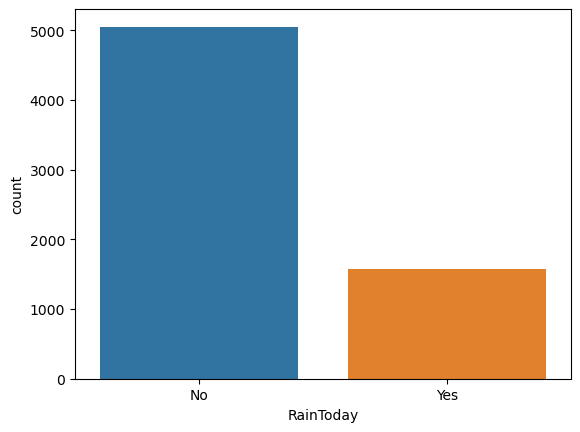

In [81]:
ax=sns.countplot(x="RainToday",data=df[categorical_cols])
print(df["RainToday"].value_counts())

# from above data we found that data is imbalanced

No     5052
Yes    1572
Name: RainTomorrow, dtype: int64


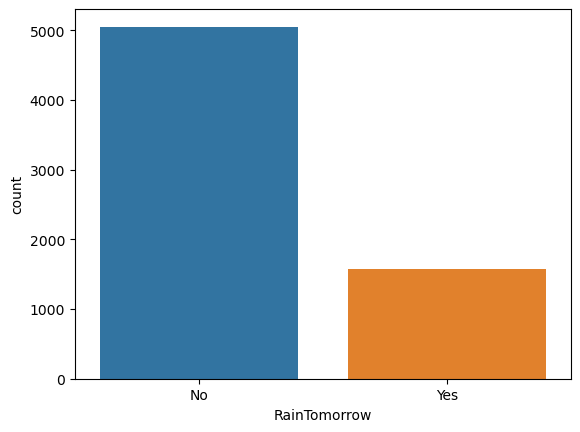

In [82]:
ax=sns.countplot(x="RainTomorrow",data=df[categorical_cols])
print(df["RainTomorrow"].value_counts())

E      518
SW     465
N      459
W      434
WSW    420
WNW    398
SSE    390
S      376
SE     370
ENE    357
NE     300
SSW    299
NW     296
NNE    287
ESE    267
NNW    184
Name: WindGustDir, dtype: int64


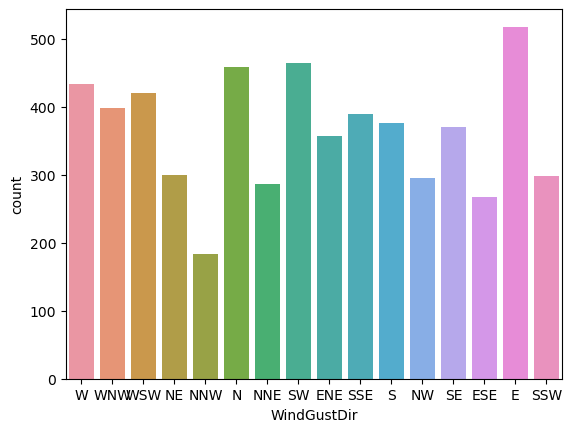

In [83]:
ax=sns.countplot(x="WindGustDir",data=df[categorical_cols])
print(df["WindGustDir"].value_counts())

N      609
SW     590
NW     463
SE     439
ENE    397
WSW    394
SSW    368
NE     364
E      338
NNE    337
S      324
WNW    301
SSE    300
W      299
ESE    229
NNW    216
Name: WindDir9am, dtype: int64


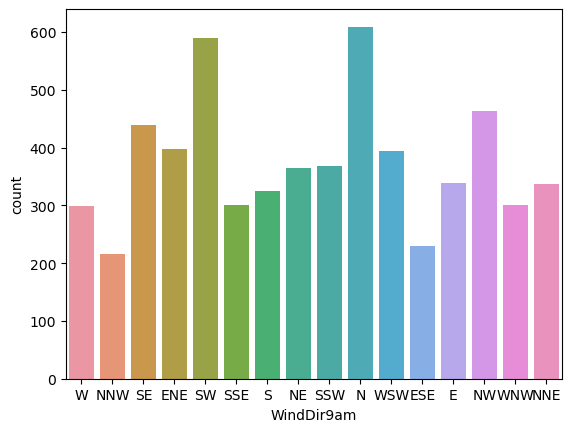

In [84]:
ax=sns.countplot(x="WindDir9am",data=df[categorical_cols])
print(df["WindDir9am"].value_counts())

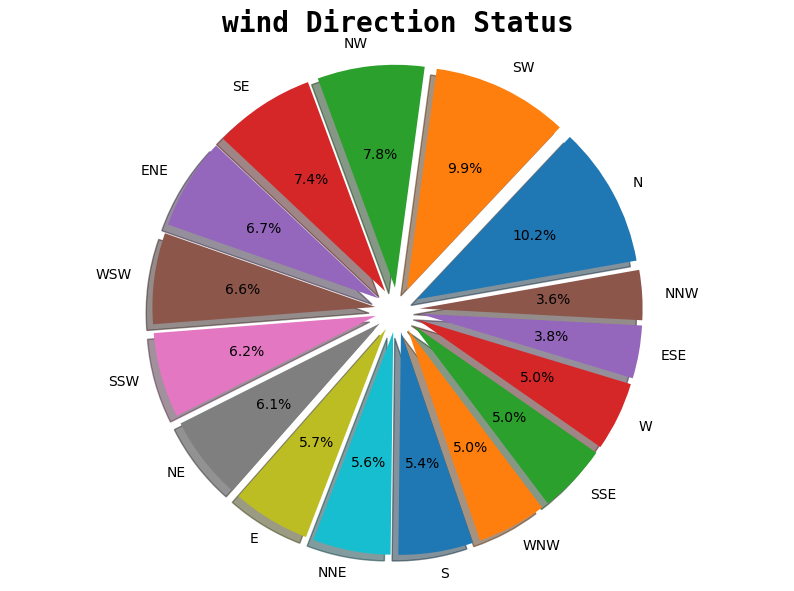

In [85]:
# Creating a pie chart for 'Raining Status'
WindDir = df['WindDir9am'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# Adjust 'explode' based on the number of categories
explode = [0.1] * len(WindDir)

plt.pie(WindDir.values, labels=WindDir.index, startangle=10, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('wind Direction Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

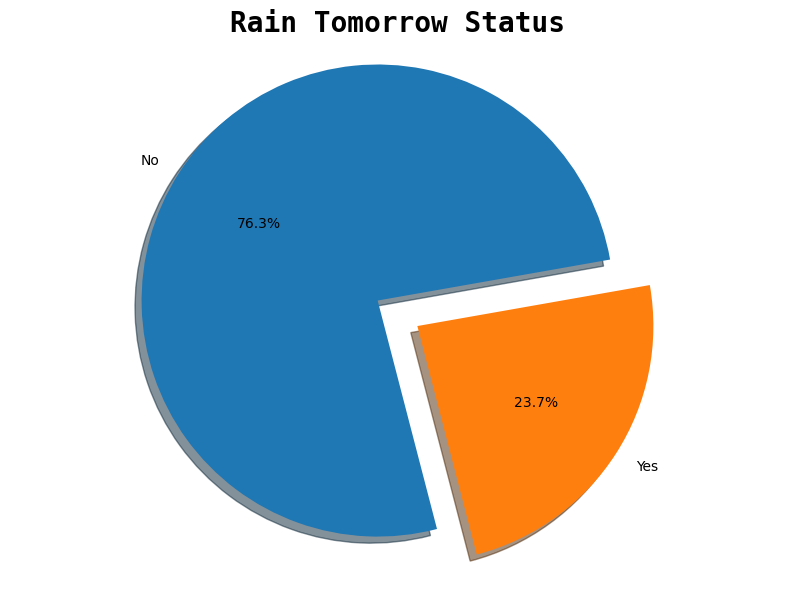

In [86]:
# Creating a pie chart for 'Raining Status'
RainTm = df['RainTomorrow'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# Adjust 'explode' based on the number of categories
explode = [0.1] * len(RainTm)

plt.pie(RainTm.values, labels=RainTm.index, startangle=10, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Rain Tomorrow Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

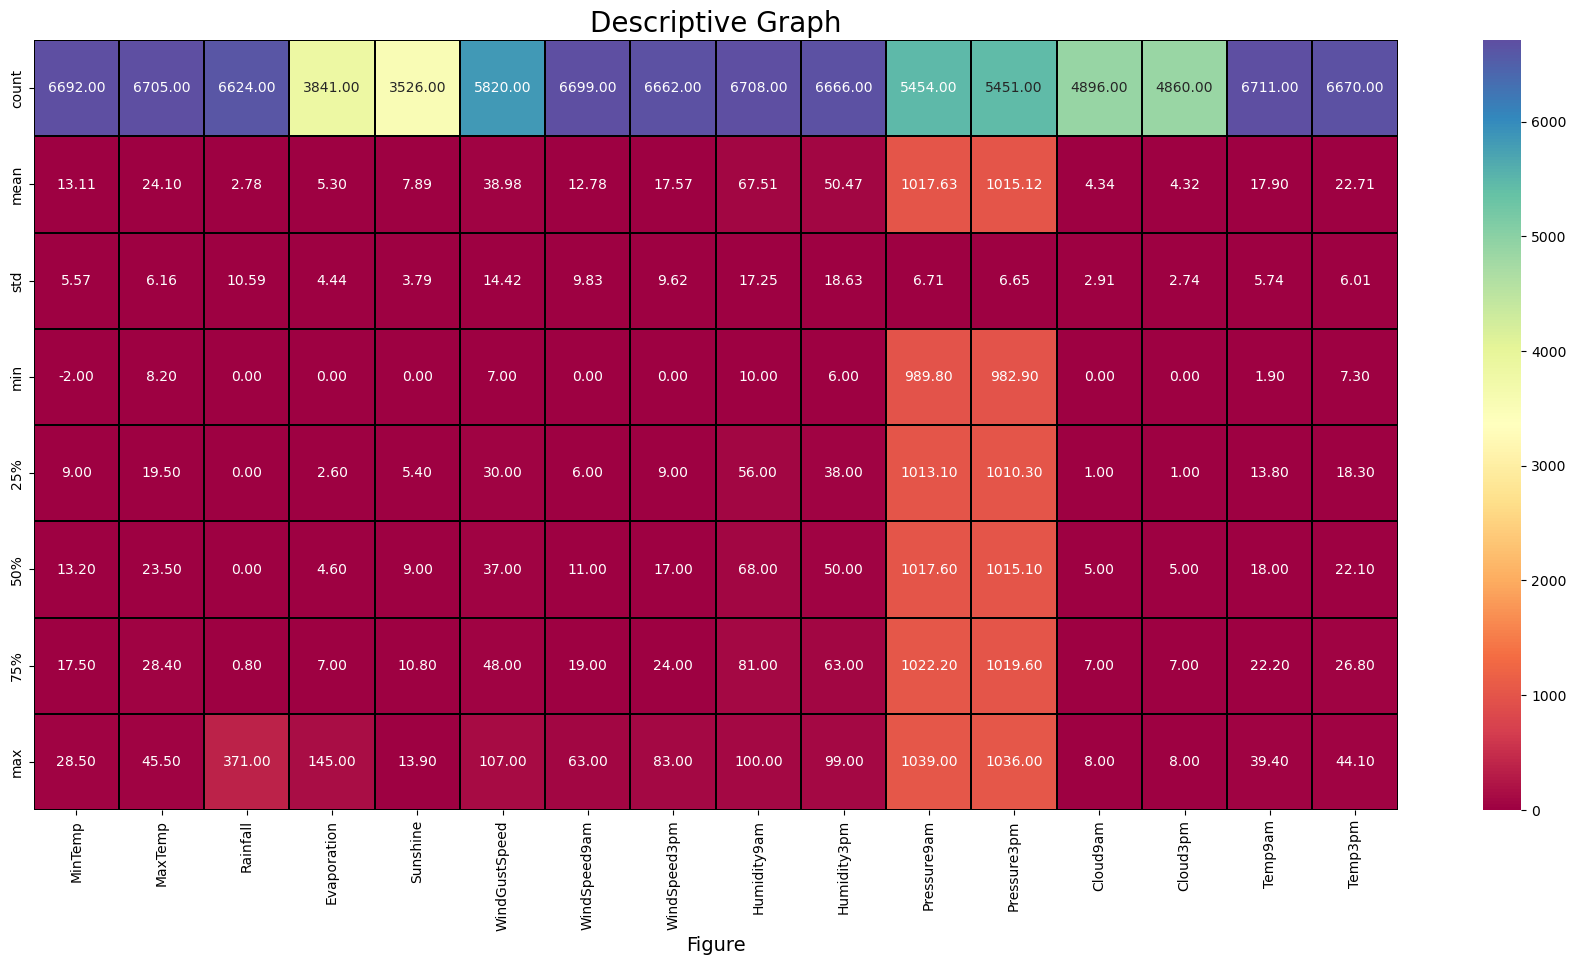

In [87]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

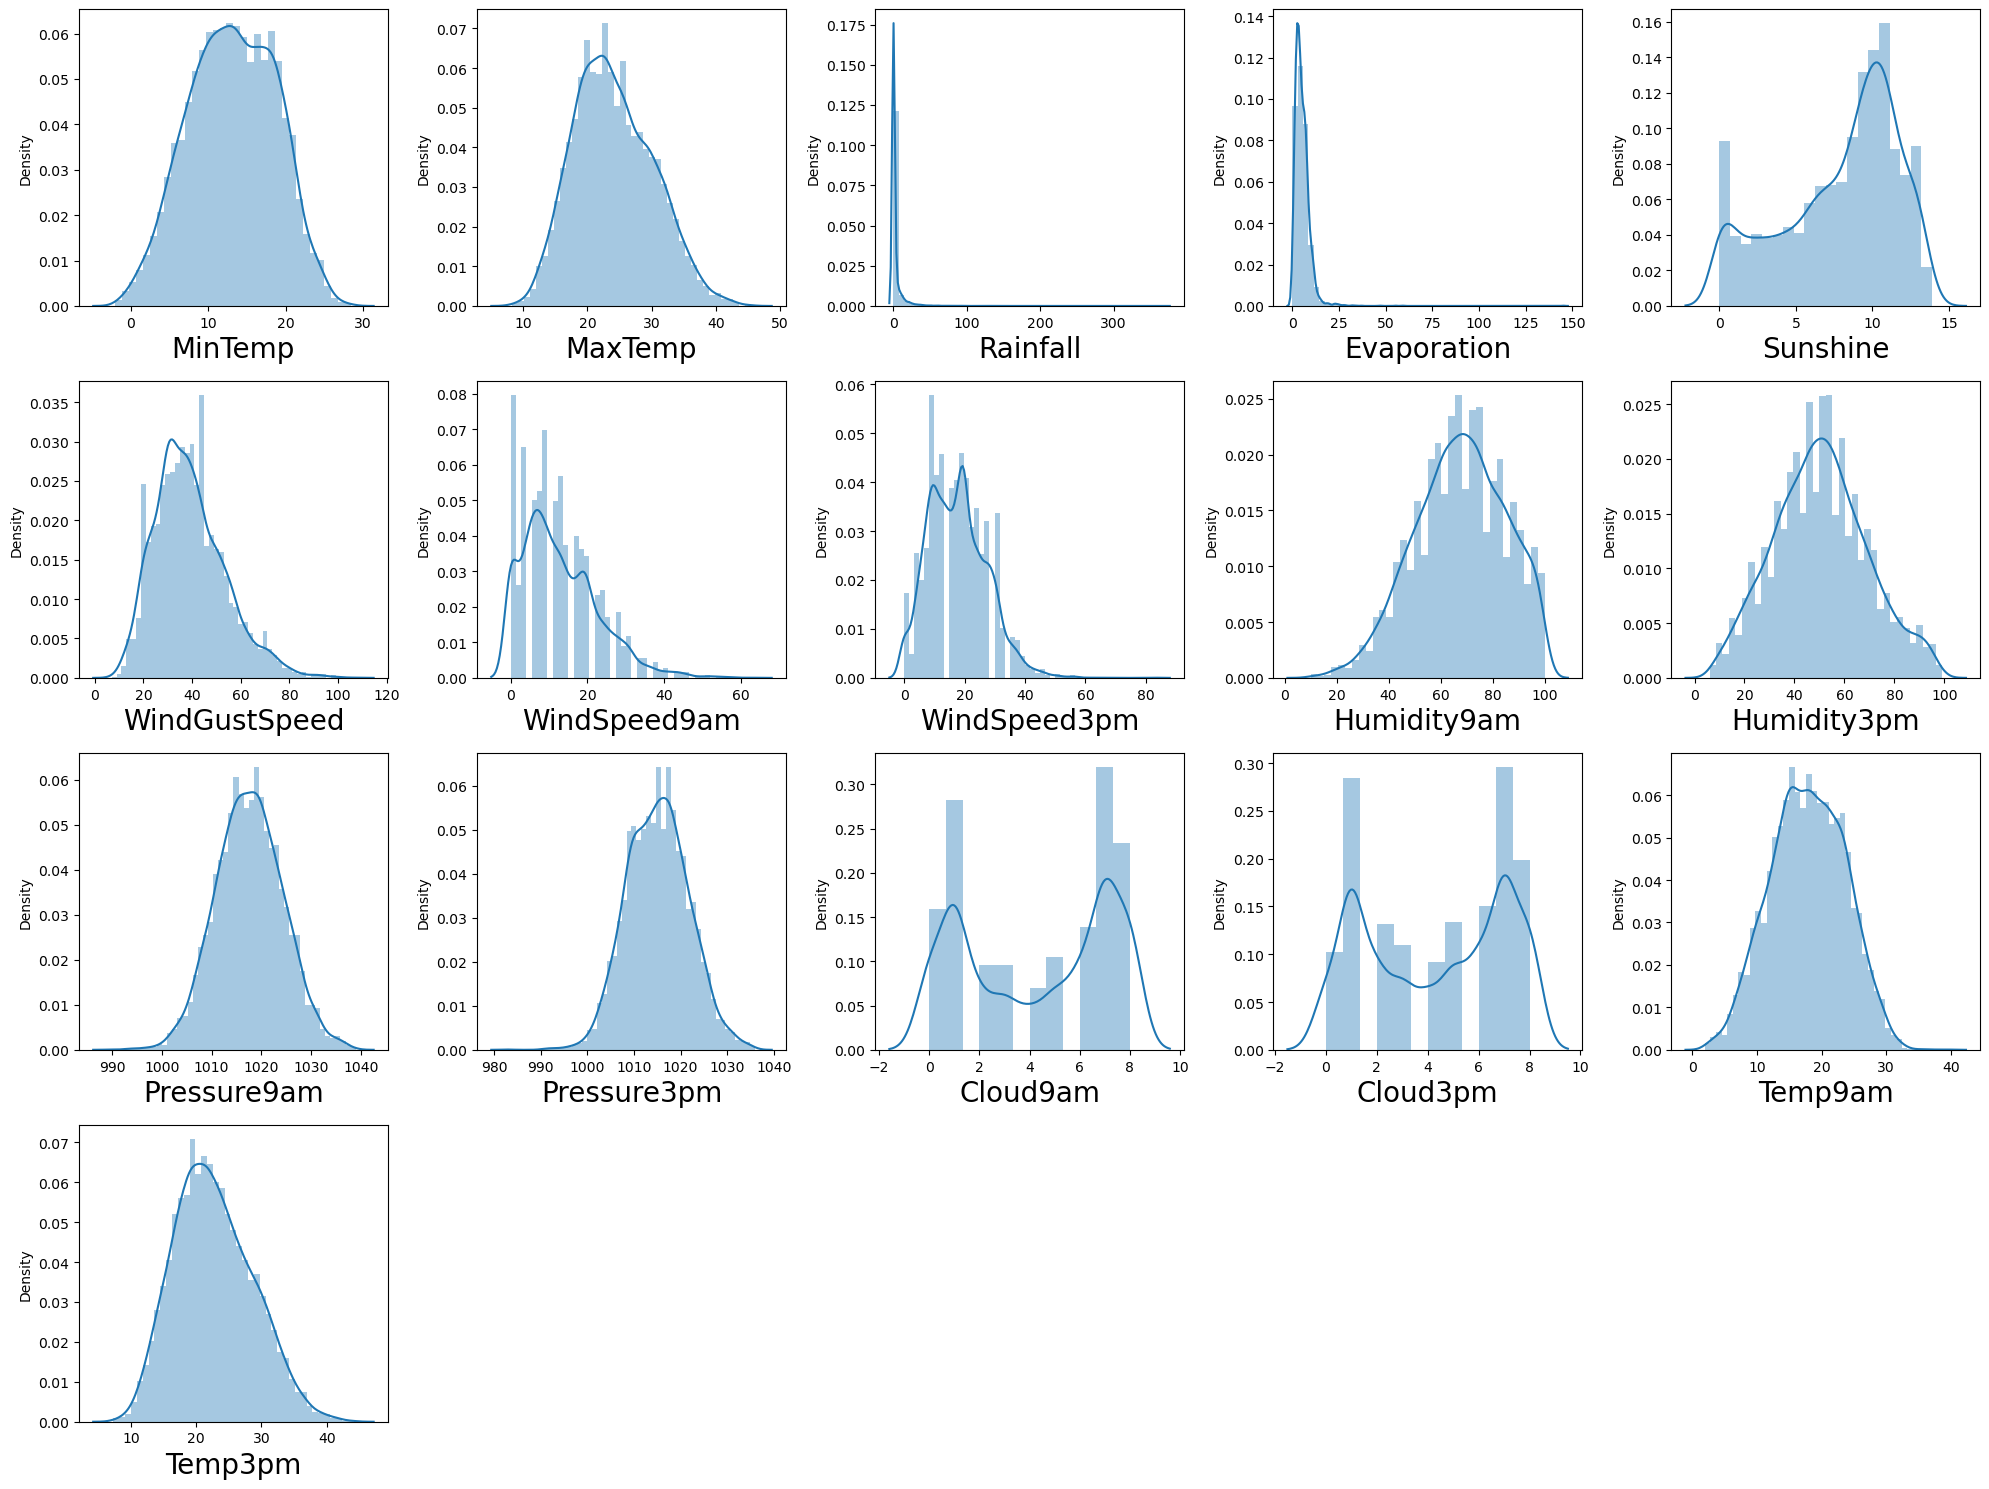

In [88]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1
for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_number +=1
plt.tight_layout()

In [89]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [90]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4     22.9       0.6          NaN       NaN   
1        1         1      7.4     25.1       0.0          NaN       NaN   
2        2         1     12.9     25.7       0.0          NaN       NaN   
3        3         1      9.2     28.0       0.0          NaN       NaN   
4        4         1     17.5     32.3       1.0          NaN       NaN   
...    ...       ...      ...      ...       ...          ...       ...   
8420  2999         9      2.8     23.4       0.0          NaN       NaN   
8421  3000         9      3.6     25.3       0.0          NaN       NaN   
8422  3001         9      5.4     26.9       0.0          NaN       NaN   
8423  3002         9      7.8     27.0       0.0          NaN       NaN   
8424  3003         9     14.9      NaN       0.0          NaN       NaN   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13           44.0          13  ...         71.0         22.0   
1              14           44.0           6  ...         44.0         25.0   
2              15           46.0          13  ...         38.0         30.0   
3               4           24.0           9  ...         45.0         16.0   
4              13           41.0           1  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420            0           31.0           9  ...         51.0         24.0   
8421            6           22.0           9  ...         56.0         21.0   
8422            3           37.0           9  ...         53.0         24.0   
8423            9           28.0          10  ...         51.0         24.0   
8424           16            NaN           2  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             2  

[6762 rows x 23 columns]

 #LabelEncoder (le) to encode the categories in that column into numerical labels. The result of this transformation is then assigned back to the same column in the DataFrame df, effectively replacing the categorical values with their corresponding numerical labels.

<Axes: xlabel='Location'>

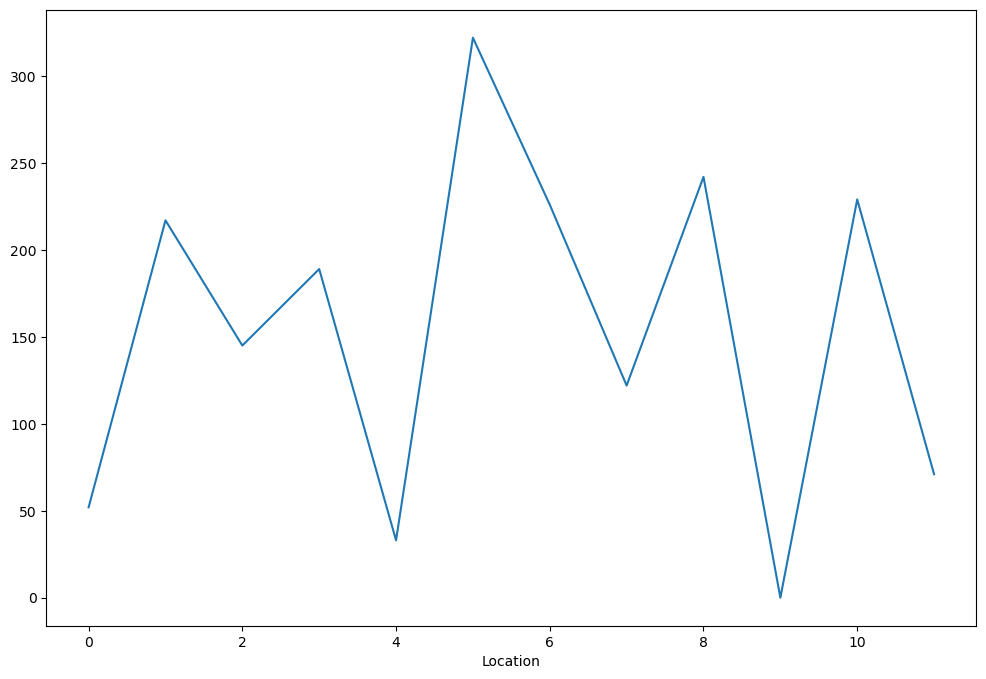

In [91]:
df.groupby("Location").sum()['RainToday'].plot(figsize=(12,8))

In [92]:
df.replace({'Yes':1, 'No':0,"NA":0}, inplace=True)

In [93]:
df=df.replace("",np.nan)
df=df.fillna(0)

In [94]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# There are no null values present in any of the above columns

In [95]:
df=df.drop(["Evaporation","Sunshine","Date","Location"],axis=1)
df

MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0        13.4     22.9       0.6           13           44.0          13   
1         7.4     25.1       0.0           14           44.0           6   
2        12.9     25.7       0.0           15           46.0          13   
3         9.2     28.0       0.0            4           24.0           9   
4        17.5     32.3       1.0           13           41.0           1   
...       ...      ...       ...          ...            ...         ...   
8420      2.8     23.4       0.0            0           31.0           9   
8421      3.6     25.3       0.0            6           22.0           9   
8422      5.4     26.9       0.0            3           37.0           9   
8423      7.8     27.0       0.0            9           28.0          10   
8424     14.9      0.0       0.0           16            0.0           2   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0             14          20.0          24.0         71.0         22.0   
1             15           4.0          22.0         44.0         25.0   
2             15          19.0          26.0         38.0         30.0   
3              0          11.0           9.0         45.0         16.0   
4              7           7.0          20.0         82.0         33.0   
...          ...           ...           ...          ...          ...   
8420           1          13.0          11.0         51.0         24.0   
8421           3          13.0           9.0         56.0         21.0   
8422          14           9.0           9.0         53.0         24.0   
8423           3          13.0           7.0         51.0         24.0   
8424           2          17.0          17.0         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       0.0     16.9     21.8   
1          1010.6       1007.8       0.0       0.0     17.2     24.3   
2          1007.6       1008.7       0.0       2.0     21.0     23.2   
3          1017.6       1012.8       0.0       0.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       0.0       0.0     10.1     22.4   
8421       1023.5       1019.1       0.0       0.0     10.9     24.5   
8422       1021.0       1016.8       0.0       0.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             2  

[6762 rows x 19 columns]

# Here we drop three columns because they have mostly Nan Values

<Axes: >

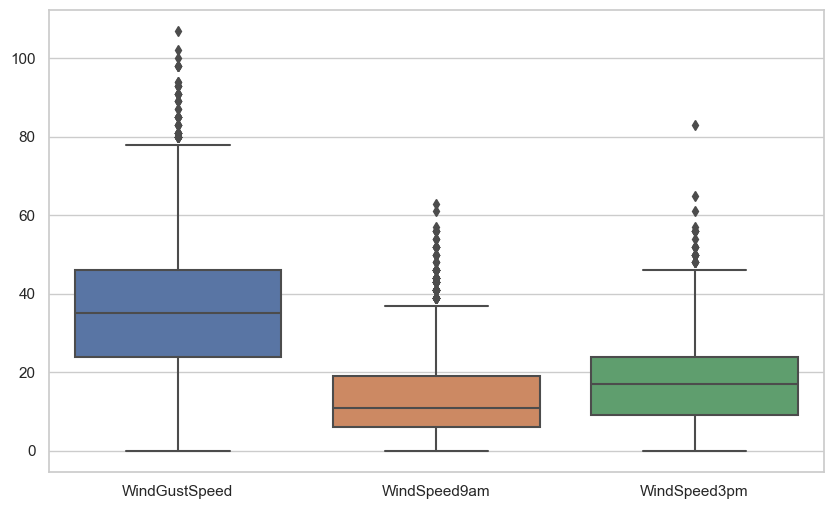

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

#The highest value is in the 'WindGustSpeed' column, it implies that the wind gust speed was the highest among the three wind speed variables during the observation period. In the boxplot

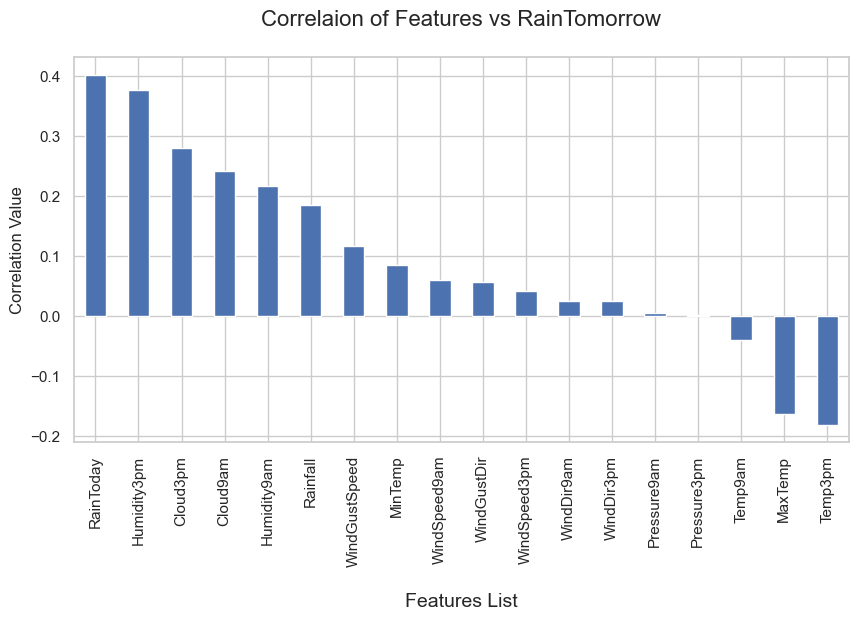

In [97]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr["RainTomorrow"].sort_values(ascending=False).drop("RainTomorrow").plot.bar()
plt.title("Correlaion of Features vs RainTomorrow\n",fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value",fontsize=12)
plt.show()

# from above data we clearly see that there is highly corelation between RainToday,Humidity,cloud3pm,cloud9am,Rainfall,windgustspeed

In [98]:
df.shape

(6762, 19)

# shape of the data,we have 6762 rows and 19 columns

In [99]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [100]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.07487545, -0.15278961, -0.20243464, ..., -0.14509242,
        -0.09189   , -0.55853037],
       [-0.97832337,  0.18496588, -0.25963545, ..., -0.09448296,
         0.29123997, -0.55853037],
       [-0.01289112,  0.27708102, -0.25963545, ...,  0.54657015,
         0.12266278, -0.55853037],
       ...,
       [-1.32938965,  0.46131128, -0.25963545, ..., -0.88736444,
         0.56709356, -0.55853037],
       [-0.90811012,  0.47666381, -0.25963545, ..., -0.44874916,
         0.55176836, -0.55853037],
       [ 0.33817515, -3.66851723, -0.25963545, ..., -0.46561897,
        -0.22981679, -0.55853037]])

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(420):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.8685376661742984
Random State: 206


In [104]:
print( "shape of x train:",x_train.shape)
print("shape of y train :",y_train.shape)
print("shape of x test:",x_test.shape)
print("shape of x train:",x_train.shape)


shape of x train: (6085, 18)
shape of y train : (6085,)
shape of x test: (677, 18)
shape of x train: (6085, 18)


In [105]:
def classify(clf,x,y):
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)
    

In [106]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.7488921713441654
confusion matrix:
 [[425  65   7]
 [ 82  79   4]
 [  7   5   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       497
           1       0.53      0.48      0.50       165
           2       0.21      0.20      0.21        15

    accuracy                           0.75       677
   macro avg       0.52      0.51      0.52       677
weighted avg       0.74      0.75      0.74       677

Cross Validation Score: 0.6773308929969344

Accuracy Score - Cross Validation Score is  0.07156127834723103


In [107]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.8153618906942393
confusion matrix:
 [[470  27   0]
 [ 84  78   3]
 [  5   6   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       497
           1       0.70      0.47      0.57       165
           2       0.57      0.27      0.36        15

    accuracy                           0.82       677
   macro avg       0.70      0.56      0.61       677
weighted avg       0.80      0.82      0.80       677

Cross Validation Score: 0.8025771133182016

Accuracy Score - Cross Validation Score is  0.01278477737603767


In [108]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.827178729689808
confusion matrix:
 [[473  24   0]
 [ 80  82   3]
 [  6   4   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       497
           1       0.75      0.50      0.60       165
           2       0.62      0.33      0.43        15

    accuracy                           0.83       677
   macro avg       0.74      0.59      0.64       677
weighted avg       0.82      0.83      0.81       677

Cross Validation Score: 0.7719777876907333

Accuracy Score - Cross Validation Score is  0.05520094199907466


In [109]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.8389955686853766
confusion matrix:
 [[481  16   0]
 [ 81  81   3]
 [  7   2   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       497
           1       0.82      0.49      0.61       165
           2       0.67      0.40      0.50        15

    accuracy                           0.84       677
   macro avg       0.78      0.62      0.67       677
weighted avg       0.83      0.84      0.82       677

Cross Validation Score: 0.7804036176456439

Accuracy Score - Cross Validation Score is  0.05859195103973269


In [110]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.8064992614475628
confusion matrix:
 [[474  23   0]
 [ 93  71   1]
 [  9   5   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       497
           1       0.72      0.43      0.54       165
           2       0.50      0.07      0.12        15

    accuracy                           0.81       677
   macro avg       0.68      0.48      0.51       677
weighted avg       0.79      0.81      0.78       677

Cross Validation Score: 0.7412202556667847

Accuracy Score - Cross Validation Score is  0.06527900578077805


In [111]:
import xgboost as xgb

In [112]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.8316100443131462
confusion matrix:
 [[465  32   0]
 [ 70  92   3]
 [  6   3   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       497
           1       0.72      0.56      0.63       165
           2       0.67      0.40      0.50        15

    accuracy                           0.83       677
   macro avg       0.75      0.63      0.68       677
weighted avg       0.82      0.83      0.82       677

Cross Validation Score: 0.7555654320663702

Accuracy Score - Cross Validation Score is  0.07604461224677606


In [113]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.8316100443131462
confusion matrix:
 [[474  23   0]
 [ 79  82   4]
 [  5   3   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       497
           1       0.76      0.50      0.60       165
           2       0.64      0.47      0.54        15

    accuracy                           0.83       677
   macro avg       0.75      0.64      0.68       677
weighted avg       0.82      0.83      0.82       677

Cross Validation Score: 0.7715346567128931

Accuracy Score - Cross Validation Score is  0.060075387600253105


In [114]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.8286558345642541
Confusion Matrix
 [[476  21   0]
 [ 83  80   2]
 [  7   3   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       497
           1       0.77      0.48      0.59       165
           2       0.71      0.33      0.45        15

    accuracy                           0.83       677
   macro avg       0.77      0.59      0.65       677
weighted avg       0.82      0.83      0.81       677



In [115]:
#Evaluate The RandomForestClassifier 

rf.score(x_test,y_test)

0.8286558345642541

In [116]:
rf.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [117]:
np.array(y_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [118]:
#compare prediction to truth labels to evaluate the model
y_predas=rf.predict(x_test)

In [119]:
np.mean(y_predas==y_test)

0.8286558345642541

In [120]:
rf.score(x_test,y_test)

0.8286558345642541

In [121]:
#Evaluate the LogisticRegression 
model=LogisticRegression()

In [122]:
model.fit(x_train,y_train)

LogisticRegression()

In [123]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

#score of the model

In [124]:
model.score(x_test,y_test)

0.8153618906942393

# predict model value

In [125]:
model.predict_proba(x_test)

array([[0.24534963, 0.75285623, 0.00179413],
       [0.95574823, 0.04315326, 0.00109852],
       [0.74631485, 0.24496415, 0.008721  ],
       ...,
       [0.8227758 , 0.16877513, 0.00844907],
       [0.40267391, 0.59470999, 0.0026161 ],
       [0.71661735, 0.27802204, 0.00536061]])

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
#Number of trees in random forest
n_estimators=[20,60,100,120]
#Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

#Number of samples
max_samples=[0.5,0.75,1.0]

In [128]:
import math

In [129]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

In [130]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth":max_depth,
           "max_samples":max_samples
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [131]:
rf=RandomForestClassifier()

In [132]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,verbose=2,
                    n_jobs=-1)

In [133]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [134]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 100}

In [135]:
rf_grid.best_score_

0.8292522596548892

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

SVM Classifier

In [137]:
from sklearn.svm import SVC
model_SVC=SVC(kernel="rbf",random_state=420)
model_SVC.fit(x_train,y_train)

y_pred_svm=model_SVC.decision_function(x_test)

SVM Classifier

In [138]:
from sklearn.linear_model import LogisticRegression 
model_logistic=LogisticRegression()
model_logistic.fit(x_train,y_train)
y_pred_logistic=model_logistic.decision_function(x_test)

In [139]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [140]:
WindGustDir_encode = LabelEncoder()
df['WindGustDir']=WindGustDir_encode.fit_transform(df['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df['WindDir9am']=WindDir9am_encode.fit_transform(df['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df['WindDir3pm']=WindDir3pm_encode.fit_transform(df['WindDir3pm'])

RainToday_encode = LabelEncoder()
df['RainToday']=RainToday_encode.fit_transform(df['RainToday'])

RainTomorrow_encode = LabelEncoder()
df['RainTomorrow']=RainTomorrow_encode.fit_transform(df["RainTomorrow"])

In [141]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [142]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

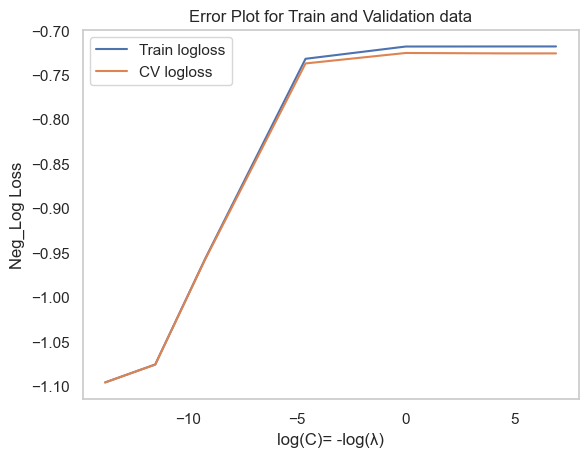

In [143]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(x_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [155]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.8286558345642541
Confusion Matrix
 [[475  22   0]
 [ 81  82   2]
 [  7   4   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       497
           1       0.76      0.50      0.60       165
           2       0.67      0.27      0.38        15

    accuracy                           0.83       677
   macro avg       0.76      0.57      0.63       677
weighted avg       0.82      0.83      0.81       677



# Save the model in pickle

In [156]:
import pickle

In [157]:
filename="Rainfall Weather Forecasting.pkl"

In [158]:
pickle.dump(rf,open(filename,"wb"))

In [159]:
#conclusion
loaded_model=pickle.load(open("Rainfall Weather Forecasting.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.86558345642541


In [160]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  667  668  \
Predicted    1    0    0    0    0    0    0    1    1    0  ...    0    0   
Origional    1    0    0    0    0    0    0    1    1    0  ...    0    0   

           669  670  671  672  673  674  675  676  
Predicted    0    0    0    0    0    0    1    0  
Origional    0    0    0    0    0    0    1    0  

[2 rows x 677 columns]

In [161]:
print(x_test)

[[ 3.20621840e-01  5.68778940e-01  1.57079044e+00 ...  4.79090879e-01
   4.60367892e-02  1.48518302e+00]
 [-2.08418214e+00 -1.04323591e+00 -2.59635448e-01 ... -1.93329321e+00
  -9.65426349e-01 -5.58530368e-01]
 [-3.63957394e-01 -1.30422879e+00 -2.21501575e-01 ... -7.86145531e-01
  -1.21062953e+00 -5.58530368e-01]
 ...
 [ 2.05839990e+00  1.32105253e+00 -2.59635448e-01 ...  2.01424439e+00
   1.19542672e+00 -5.58530368e-01]
 [-8.20343551e-01 -1.68804184e+00 -2.59635448e-01 ... -1.05606263e+00
  -1.63973511e+00 -5.58530368e-01]
 [ 1.09296764e+00 -1.68142132e-01 -2.40568512e-01 ...  3.44132328e-01
   6.11920105e-05 -5.58530368e-01]]


In [162]:
print(y_test)

726     1
537     0
4871    0
3312    0
1123    0
       ..
4942    1
4637    0
8168    0
1386    1
2054    0
Name: RainTomorrow, Length: 677, dtype: int32


# RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

In [163]:
x=df.drop("RainToday",axis=1)
y=df["RainToday"]

In [164]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(420):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.9645494830132939
Random State: 392


In [165]:
def classify(clf,x,y):
    
    #training the model
    clf.fit(x_train,y_train)
    
    #predicting Y_Test
    pred=clf.predict(x_test)
    
    #Accuracy Score
    acc_score =(accuracy_score(y_test,pred))
    print ("Accuracy Score:",acc_score)
    
    #confusion matrix:
    print("confusion matrix:\n",confusion_matrix(y_test,pred))
    
    #classification report
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    #cross validation score
    cv_score =(cross_val_score(clf,x,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #result of accuracy minus cv scores
    result=acc_score-cv_score
    print("\nAccuracy Score - Cross Validation Score is ",result)

In [166]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.9852289512555391
confusion matrix:
 [[508   0   5]
 [  0 153   0]
 [  5   0   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       513
           1       1.00      1.00      1.00       153
           2       0.55      0.55      0.55        11

    accuracy                           0.99       677
   macro avg       0.85      0.85      0.85       677
weighted avg       0.99      0.99      0.99       677

Cross Validation Score: 0.9602221886931079

Accuracy Score - Cross Validation Score is  0.025006762562431173


In [167]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.9231905465288035
confusion matrix:
 [[502  11   0]
 [ 31 122   0]
 [ 10   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       513
           1       0.92      0.80      0.85       153
           2       1.00      0.09      0.17        11

    accuracy                           0.92       677
   macro avg       0.95      0.62      0.66       677
weighted avg       0.92      0.92      0.92       677

Cross Validation Score: 0.9148251529583611

Accuracy Score - Cross Validation Score is  0.008365393570442414


In [168]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.9896602658788775
confusion matrix:
 [[511   0   2]
 [  0 153   0]
 [  5   0   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       513
           1       1.00      1.00      1.00       153
           2       0.75      0.55      0.63        11

    accuracy                           0.99       677
   macro avg       0.91      0.85      0.87       677
weighted avg       0.99      0.99      0.99       677

Cross Validation Score: 0.9787067529093795

Accuracy Score - Cross Validation Score is  0.01095351296949798


In [171]:
clf=SVC()
classify(clf,x,y)

Accuracy Score: 0.7621861152141802
confusion matrix:
 [[513   0   0]
 [150   3   0]
 [ 11   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       513
           1       1.00      0.02      0.04       153
           2       0.00      0.00      0.00        11

    accuracy                           0.76       677
   macro avg       0.59      0.34      0.30       677
weighted avg       0.80      0.76      0.66       677

Cross Validation Score: 0.752587390720599

Accuracy Score - Cross Validation Score is  0.009598724493581234


In [172]:
clf=KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.8641063515509602
confusion matrix:
 [[494  19   0]
 [ 63  90   0]
 [  7   3   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       513
           1       0.80      0.59      0.68       153
           2       1.00      0.09      0.17        11

    accuracy                           0.86       677
   macro avg       0.89      0.55      0.59       677
weighted avg       0.86      0.86      0.85       677

Cross Validation Score: 0.7943081777509545

Accuracy Score - Cross Validation Score is  0.06979817380000564


In [173]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.9911373707533235
confusion matrix:
 [[511   0   2]
 [  0 153   0]
 [  4   0   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       513
           1       1.00      1.00      1.00       153
           2       0.78      0.64      0.70        11

    accuracy                           0.99       677
   macro avg       0.92      0.88      0.90       677
weighted avg       0.99      0.99      0.99       677

Cross Validation Score: 0.9756006813699122

Accuracy Score - Cross Validation Score is  0.01553668938341135


In [174]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.9911373707533235
confusion matrix:
 [[511   0   2]
 [  0 153   0]
 [  4   0   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       513
           1       1.00      1.00      1.00       153
           2       0.78      0.64      0.70        11

    accuracy                           0.99       677
   macro avg       0.92      0.88      0.90       677
weighted avg       0.99      0.99      0.99       677

Cross Validation Score: 0.9677676607320134

Accuracy Score - Cross Validation Score is  0.023369710021310164


In [175]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.9881831610044313
Confusion Matrix
 [[511   0   2]
 [  0 153   0]
 [  6   0   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       513
           1       1.00      1.00      1.00       153
           2       0.71      0.45      0.56        11

    accuracy                           0.99       677
   macro avg       0.90      0.82      0.85       677
weighted avg       0.99      0.99      0.99       677



# XGB CLASSIFIER is best classifier with 0.99  accuracy 

In [176]:
#Evaluate The RandomForestClassifier 

rf.score(x_test,y_test)

0.9881831610044313

In [177]:
rf.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

# Score Random Classifier

In [178]:
rf.score(x_test,y_test)

0.9881831610044313

In [179]:
rf.predict_proba(x_test)

array([[0.03, 0.97, 0.  ],
       [0.97, 0.02, 0.01],
       [0.97, 0.02, 0.01],
       ...,
       [0.94, 0.03, 0.03],
       [0.95, 0.04, 0.01],
       [0.94, 0.05, 0.01]])